## Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

### Importação dos dados



In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

In [ ]:
datype ={'Produto': 'string', 'cat_produto': 'string', 'vendedor': 'string', 'tipo_compra':'category', 'local_compra':'string'}
col = ['produto', 'cat_produto', 'preco', 'frete', 'Data da Compra', 'vendedor', 'local_compra', 'nota_compra', 'tipo_pagamento', 'qtd_parcelas', 'lat', 'lon']

loja1 = pd.read_csv(url,  header=0, names=col, dtype=datype)
loja2 = pd.read_csv(url2, header=0, names=col, dtype=datype)
loja3 = pd.read_csv(url3, header=0, names=col, dtype=datype)
loja4 = pd.read_csv(url4, header=0, names=col, dtype=datype)

In [4]:
#loja1.info()
loja1.head(5)

,produto,cat_produto,preco,frete,Data da Compra,vendedor,local_compra,nota_compra,tipo_pagamento,qtd_parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Converter em Tipo datatype

In [5]:
#Loja 1
loja1['data_compra'] = pd.to_datetime(loja1['Data da Compra'], format="%d/%m/%Y")
loja1.pop('Data da Compra')
loja1['ano']= loja1.data_compra.dt.year
loja1['trimestre']= loja1.data_compra.dt.quarter
#Loja 2
loja2['data_compra'] = pd.to_datetime(loja2['Data da Compra'], format="%d/%m/%Y")
loja2.pop('Data da Compra')
loja2['ano']= loja2.data_compra.dt.year
loja2['trimestre']= loja2.data_compra.dt.quarter
#Loja 3
loja3['data_compra'] = pd.to_datetime(loja3['Data da Compra'], format="%d/%m/%Y")
loja3.pop('Data da Compra')
loja3['ano']= loja3.data_compra.dt.year
loja3['trimestre']= loja3.data_compra.dt.quarter
#Loja 4
loja4['data_compra']= pd.to_datetime(loja4['Data da Compra'], format="%d/%m/%Y")
loja4.pop('Data da Compra')
loja4['ano']= loja4.data_compra.dt.year
loja4['trimestre']= loja4.data_compra.dt.quarter

#1. Análise do faturamento


# 2. Vendas por Categoria


In [ ]:
#Loja_01
cat_loja1 = loja1.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
#Loja_02
cat_loja2 = loja2.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()

#Loja_03
cat_loja3 = loja3.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()

#Loja_04
cat_loja4 = loja4.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()

#frames = [cat_loja1, cat_loja2, cat_loja3, cat_loja4]
#vendas_categorias = pd.concat(frames)



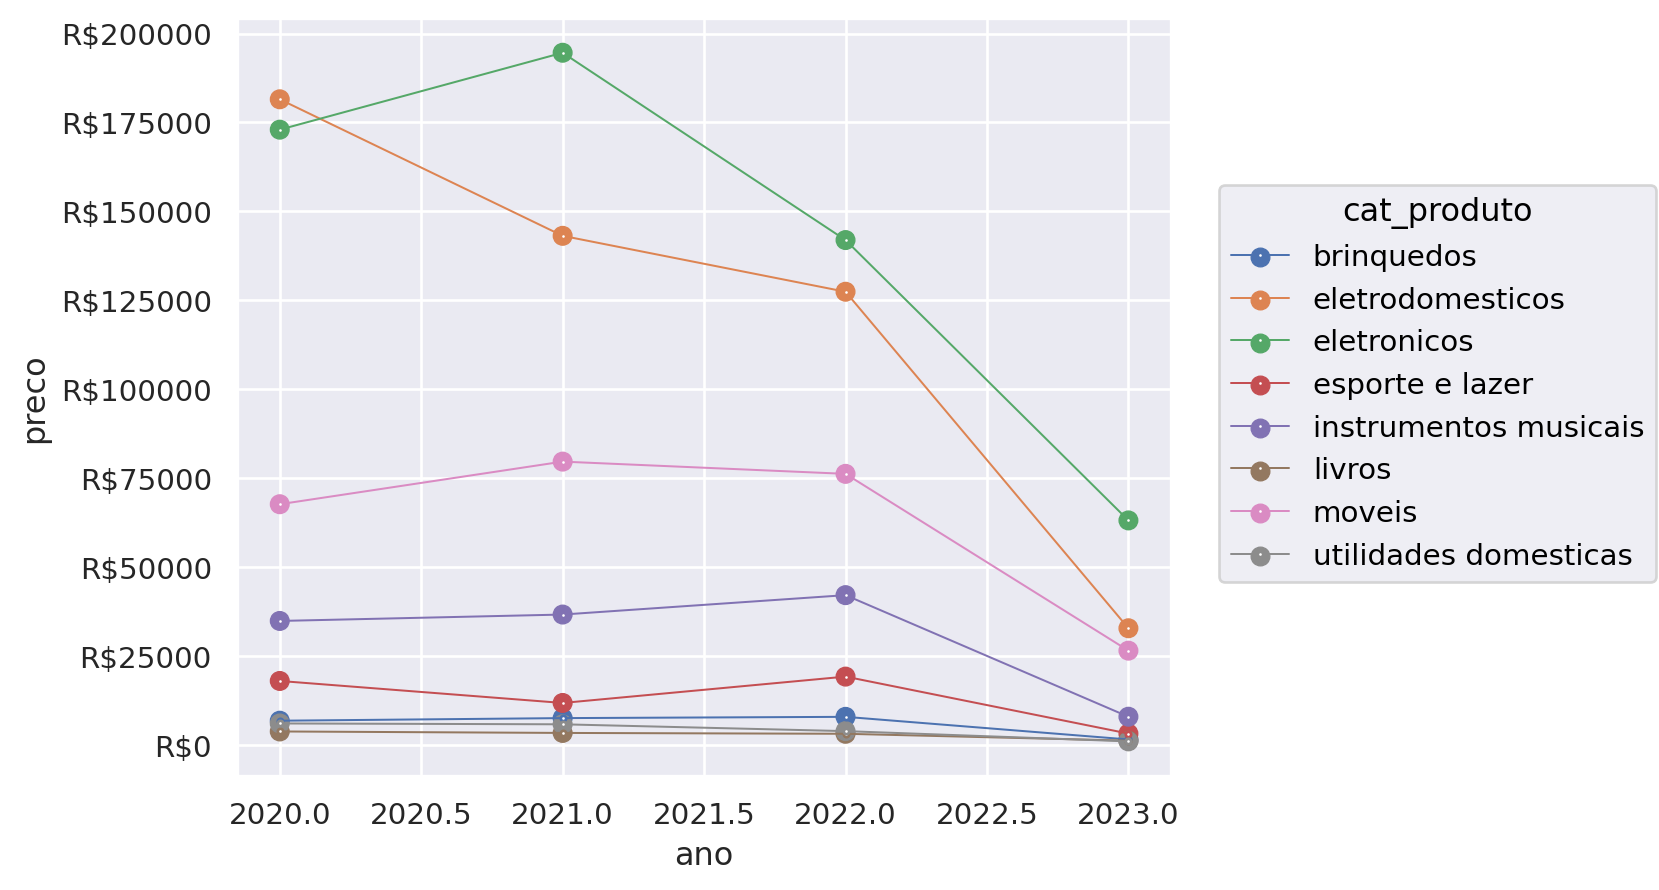

In [ ]:
p1 = so.Plot(cat_loja1, y='preco', x='ano', color='cat_produto').scale(
    y=so.Continuous().label(like="R${x:g}")
)
p1.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))


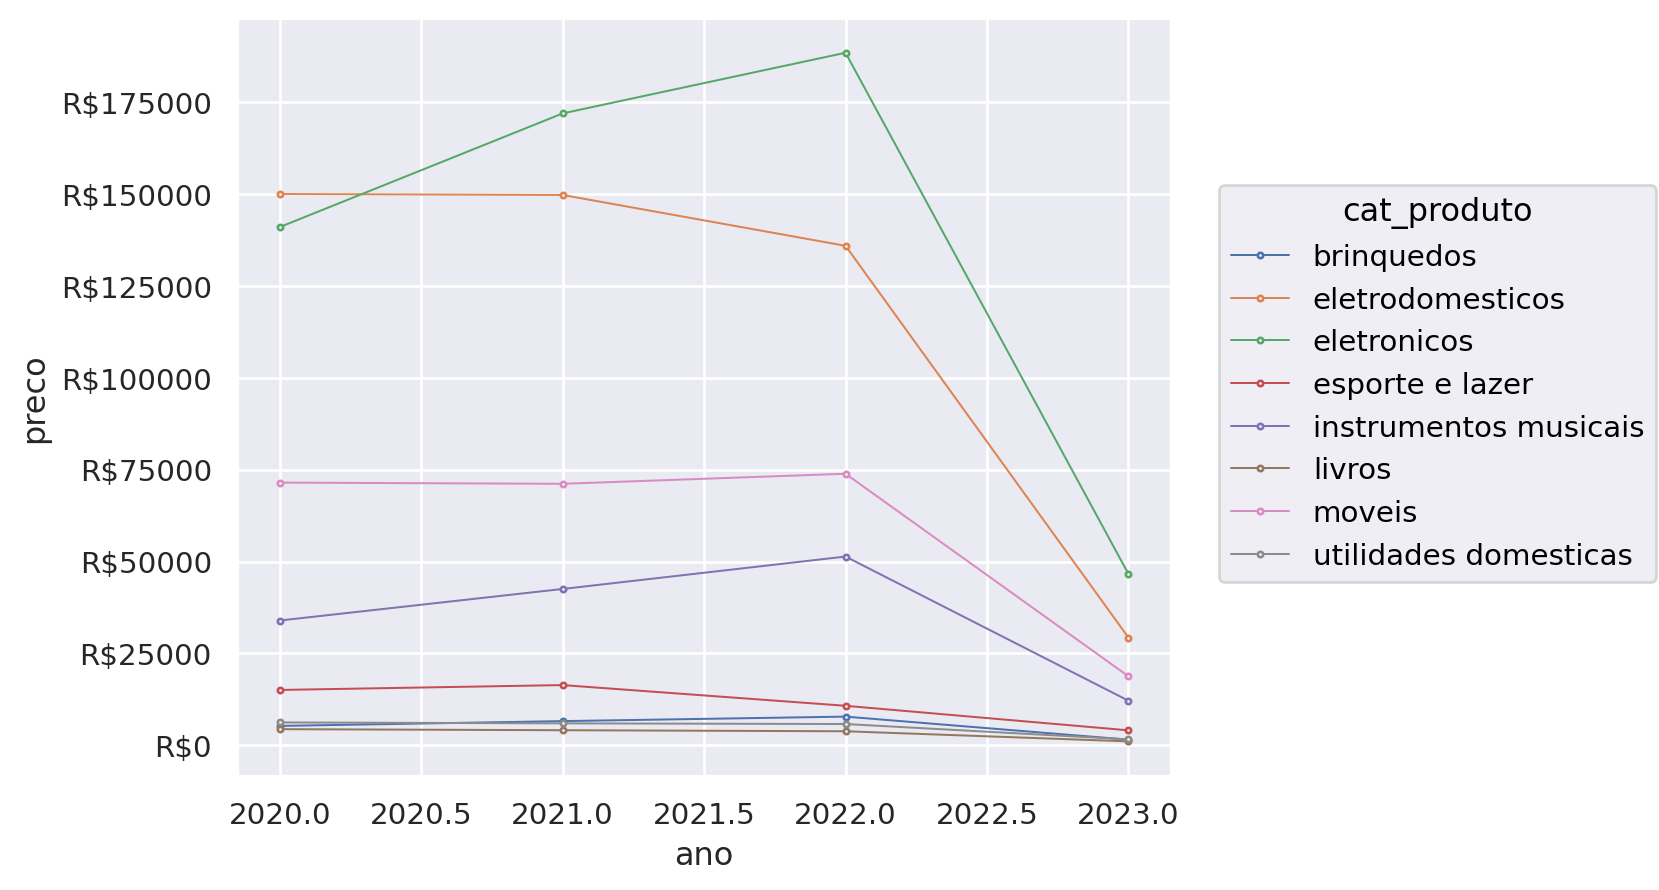

In [77]:
p2 = so.Plot(cat_loja2, y='preco', x='ano', color='cat_produto').scale(
    y=so.Continuous().label(like="R${x:g}")
)
p2.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))

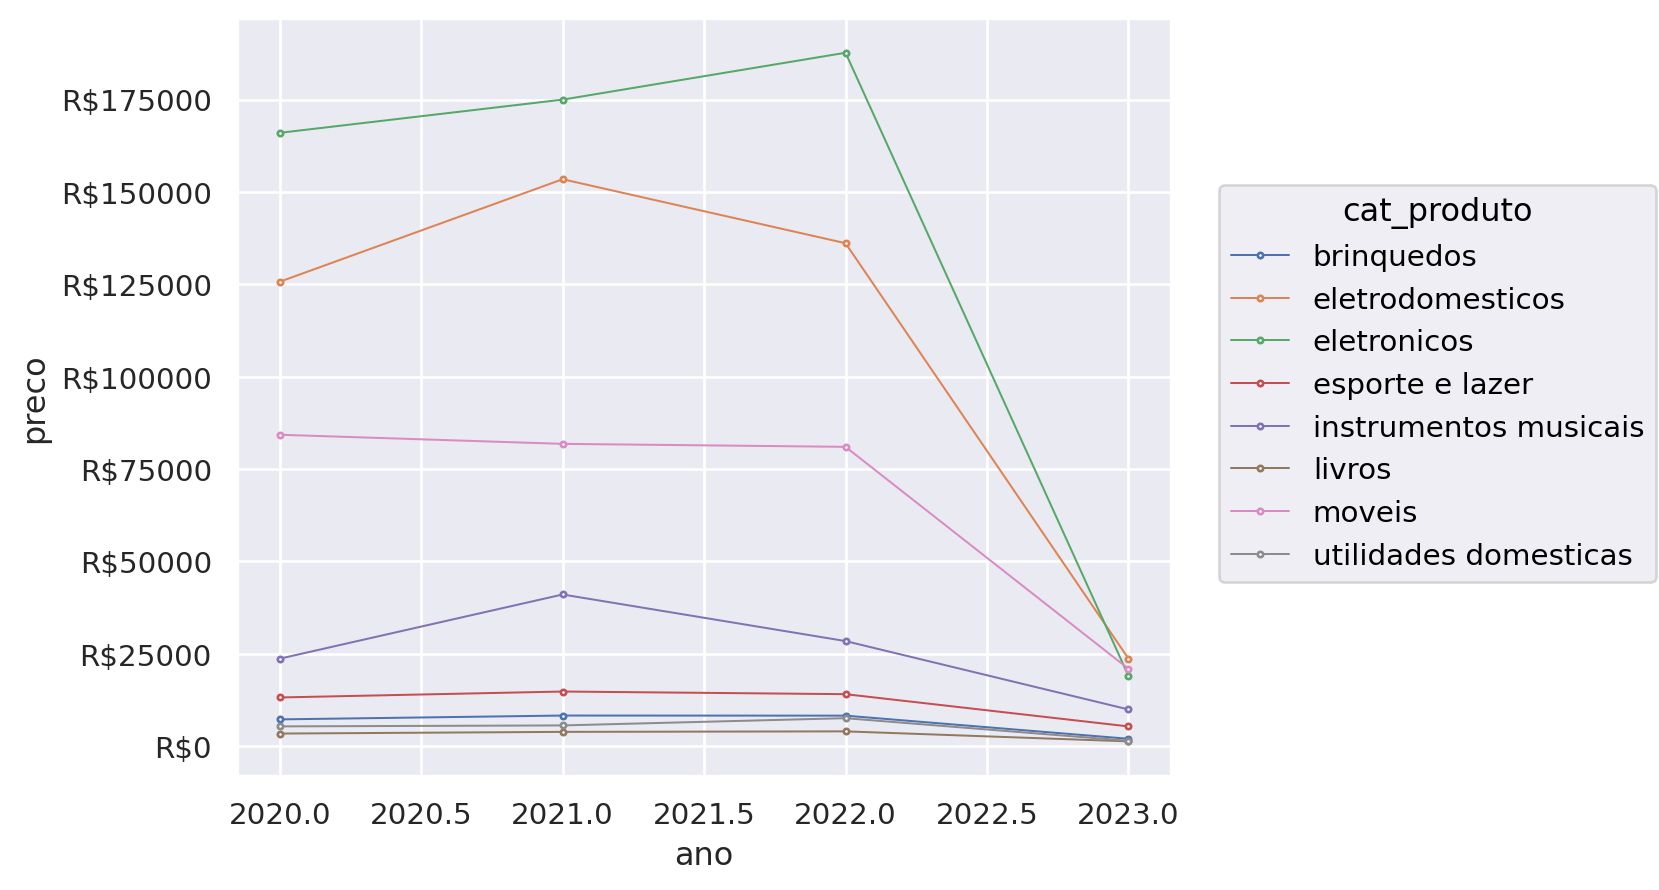

In [75]:
p3 = so.Plot(cat_loja3, y='preco', x='ano', color='cat_produto').scale(
    y=so.Continuous().label(
        like="R${x:g}")
)
p3.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))

In [94]:
p4 = so.Plot(cat_loja4, y='preco', x='ano', color='cat_produto').scale(
    y=so.Continuous().label(like="R${x:.0f}").label(legend='LOJA')
)
p4.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))


TypeError: Continuous.label() got an unexpected keyword argument 'legend'

# 3. Média de Avaliação das Lojas

In [136]:
media_nota_loja1 = loja1.groupby(['ano'], as_index=False)['nota_compra'].mean()
media_nota_loja2 = loja2.groupby(['ano'], as_index=False)['nota_compra'].mean()
media_nota_loja3 = loja3.groupby(['ano'], as_index=False)['nota_compra'].mean()
media_nota_loja4 = loja4.groupby(['ano'], as_index=False)['nota_compra'].mean()

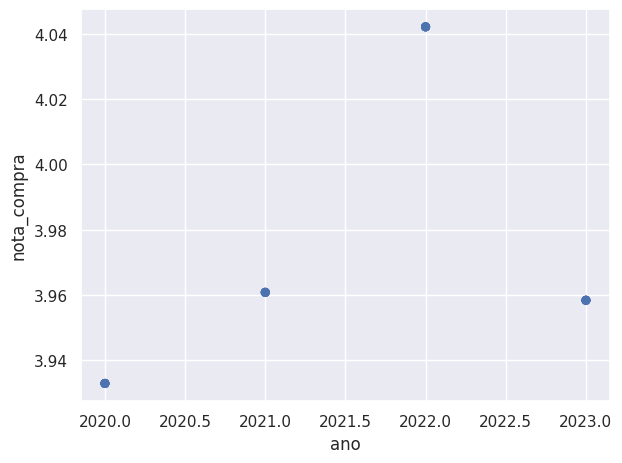

In [ ]:
nota_loja1 =so.Plot(media_nota_loja1, x="ano", y="nota_compra").add(
    so.Dot(), so.Perc(5))
nota_loja1.show()

<Axes: xlabel='ano', ylabel='nota_compra'>

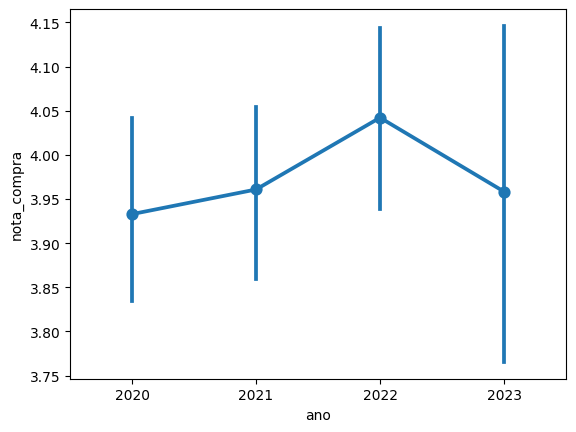

In [156]:
sns.pointplot(data=loja1, x="ano", y="nota_compra")

# 4. Produtos Mais e Menos Vendidos

In [144]:
loja1.head(3)

,produto,cat_produto,preco,frete,vendedor,local_compra,nota_compra,tipo_pagamento,qtd_parcelas,lat,lon,data_compra,ano,trimestre
0,Assistente virtual,eletronicos,219.08,9.249790,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,2021-01-16,2021,1
1,Mesa de jantar,moveis,256.35,11.234305,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,2022-05-18,2022,2
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,2021-03-15,2021,1


# 5. Frete Médio por Loja
